In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Problem Statement**

predicting sales based on the money spent on different platforms for marketing.

**Importing Modules**

In [45]:
import numpy as np #for numerical processing
import pandas as pd #for manupulating data
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for potting


from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')


**Importing Data**

In [46]:
data= pd.DataFrame(pd.read_csv("../input/advertising.csv"))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


** common Utils**

In [47]:
data.shape

(200, 4)

In [48]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [49]:
data.isnull==True


False

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


**Visualization**

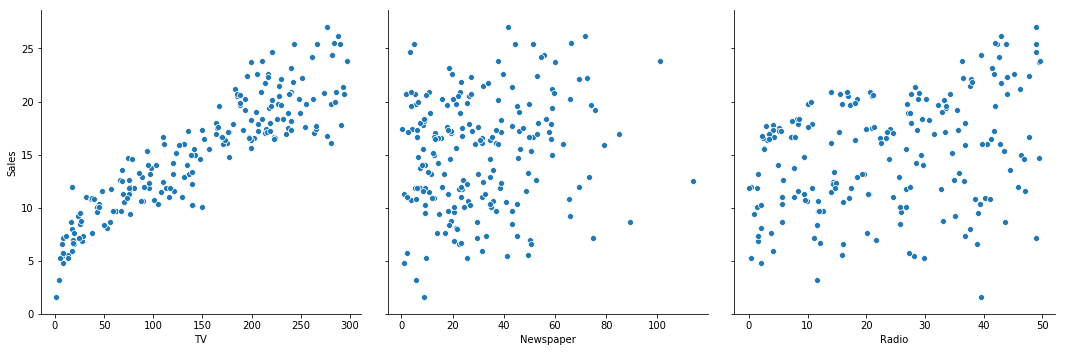

In [51]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

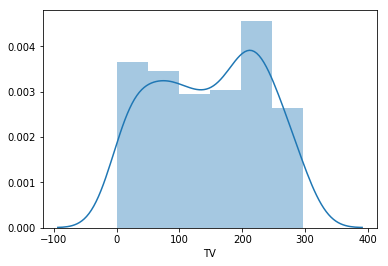

In [55]:
# Let's see how Sales are related with other variables using scatter plot.
sns.distplot(data['TV'])
plt.show()

In [ ]:
sns.distplot(data['TV'])
plt.show()

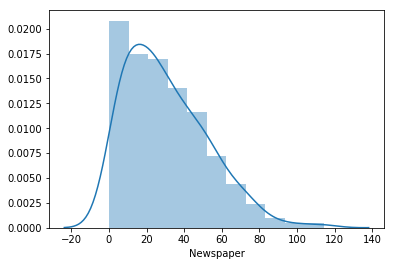

In [56]:
sns.distplot(data['Newspaper'])
plt.show()

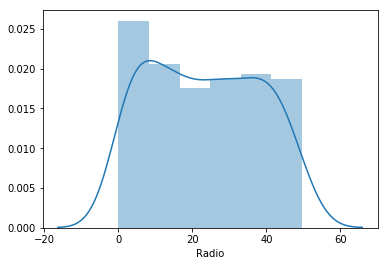

In [57]:
sns.distplot(data['Radio'])
plt.show()

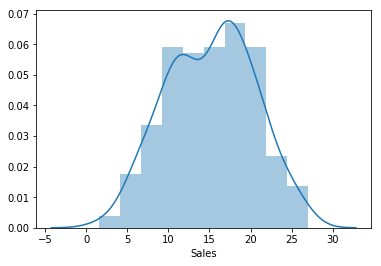

In [58]:
sns.distplot(data['Sales'])
plt.show()

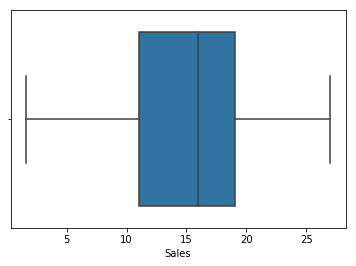

In [59]:
sns.boxplot(data['Sales'])
plt.show()

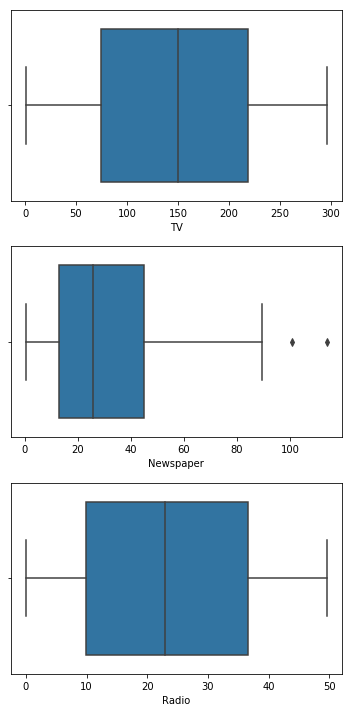

In [60]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,10))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

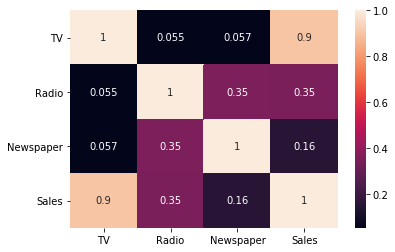

In [61]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), annot = True)
plt.show()

In [62]:
X = data['TV']
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 100)

In [63]:

import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [64]:
lr.params

const    7.028821
TV       0.054716
dtype: float64

In [65]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           3.70e-66
Time:                        11:24:12   Log-Likelihood:                -406.93
No. Observations:                 180   AIC:                             817.9
Df Residuals:                     178   BIC:                             824.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0288      0.337     20.834      0.0

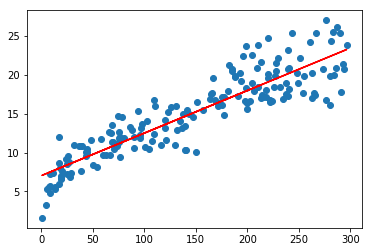

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.0288 + 0.0547*X_train, 'r')
plt.show()

In [67]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

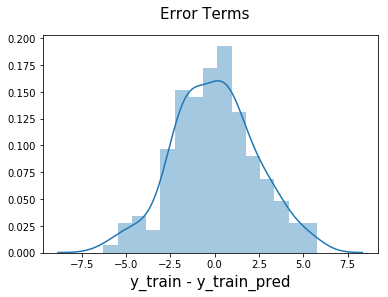

In [68]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [71]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.9465791602696507

In [72]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8178062275734868

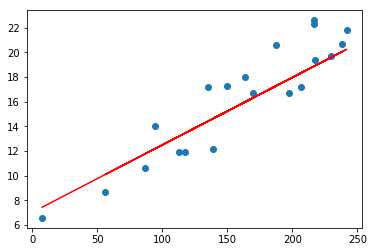

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_test,7.0288 + 0.0547 * X_test, 'r')
plt.show()